In [283]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [284]:
teams = pd.read_csv("../cleaned_data/teams.csv")
players_teams = pd.read_csv("../cleaned_data/players_teams.csv")
teams = pd.read_csv("../cleaned_data/teams.csv")
coaches = pd.read_csv("../cleaned_data/coaches.csv")
coach_awards = pd.read_csv("../cleaned_data/coach_awards.csv")

### Teams Dataset

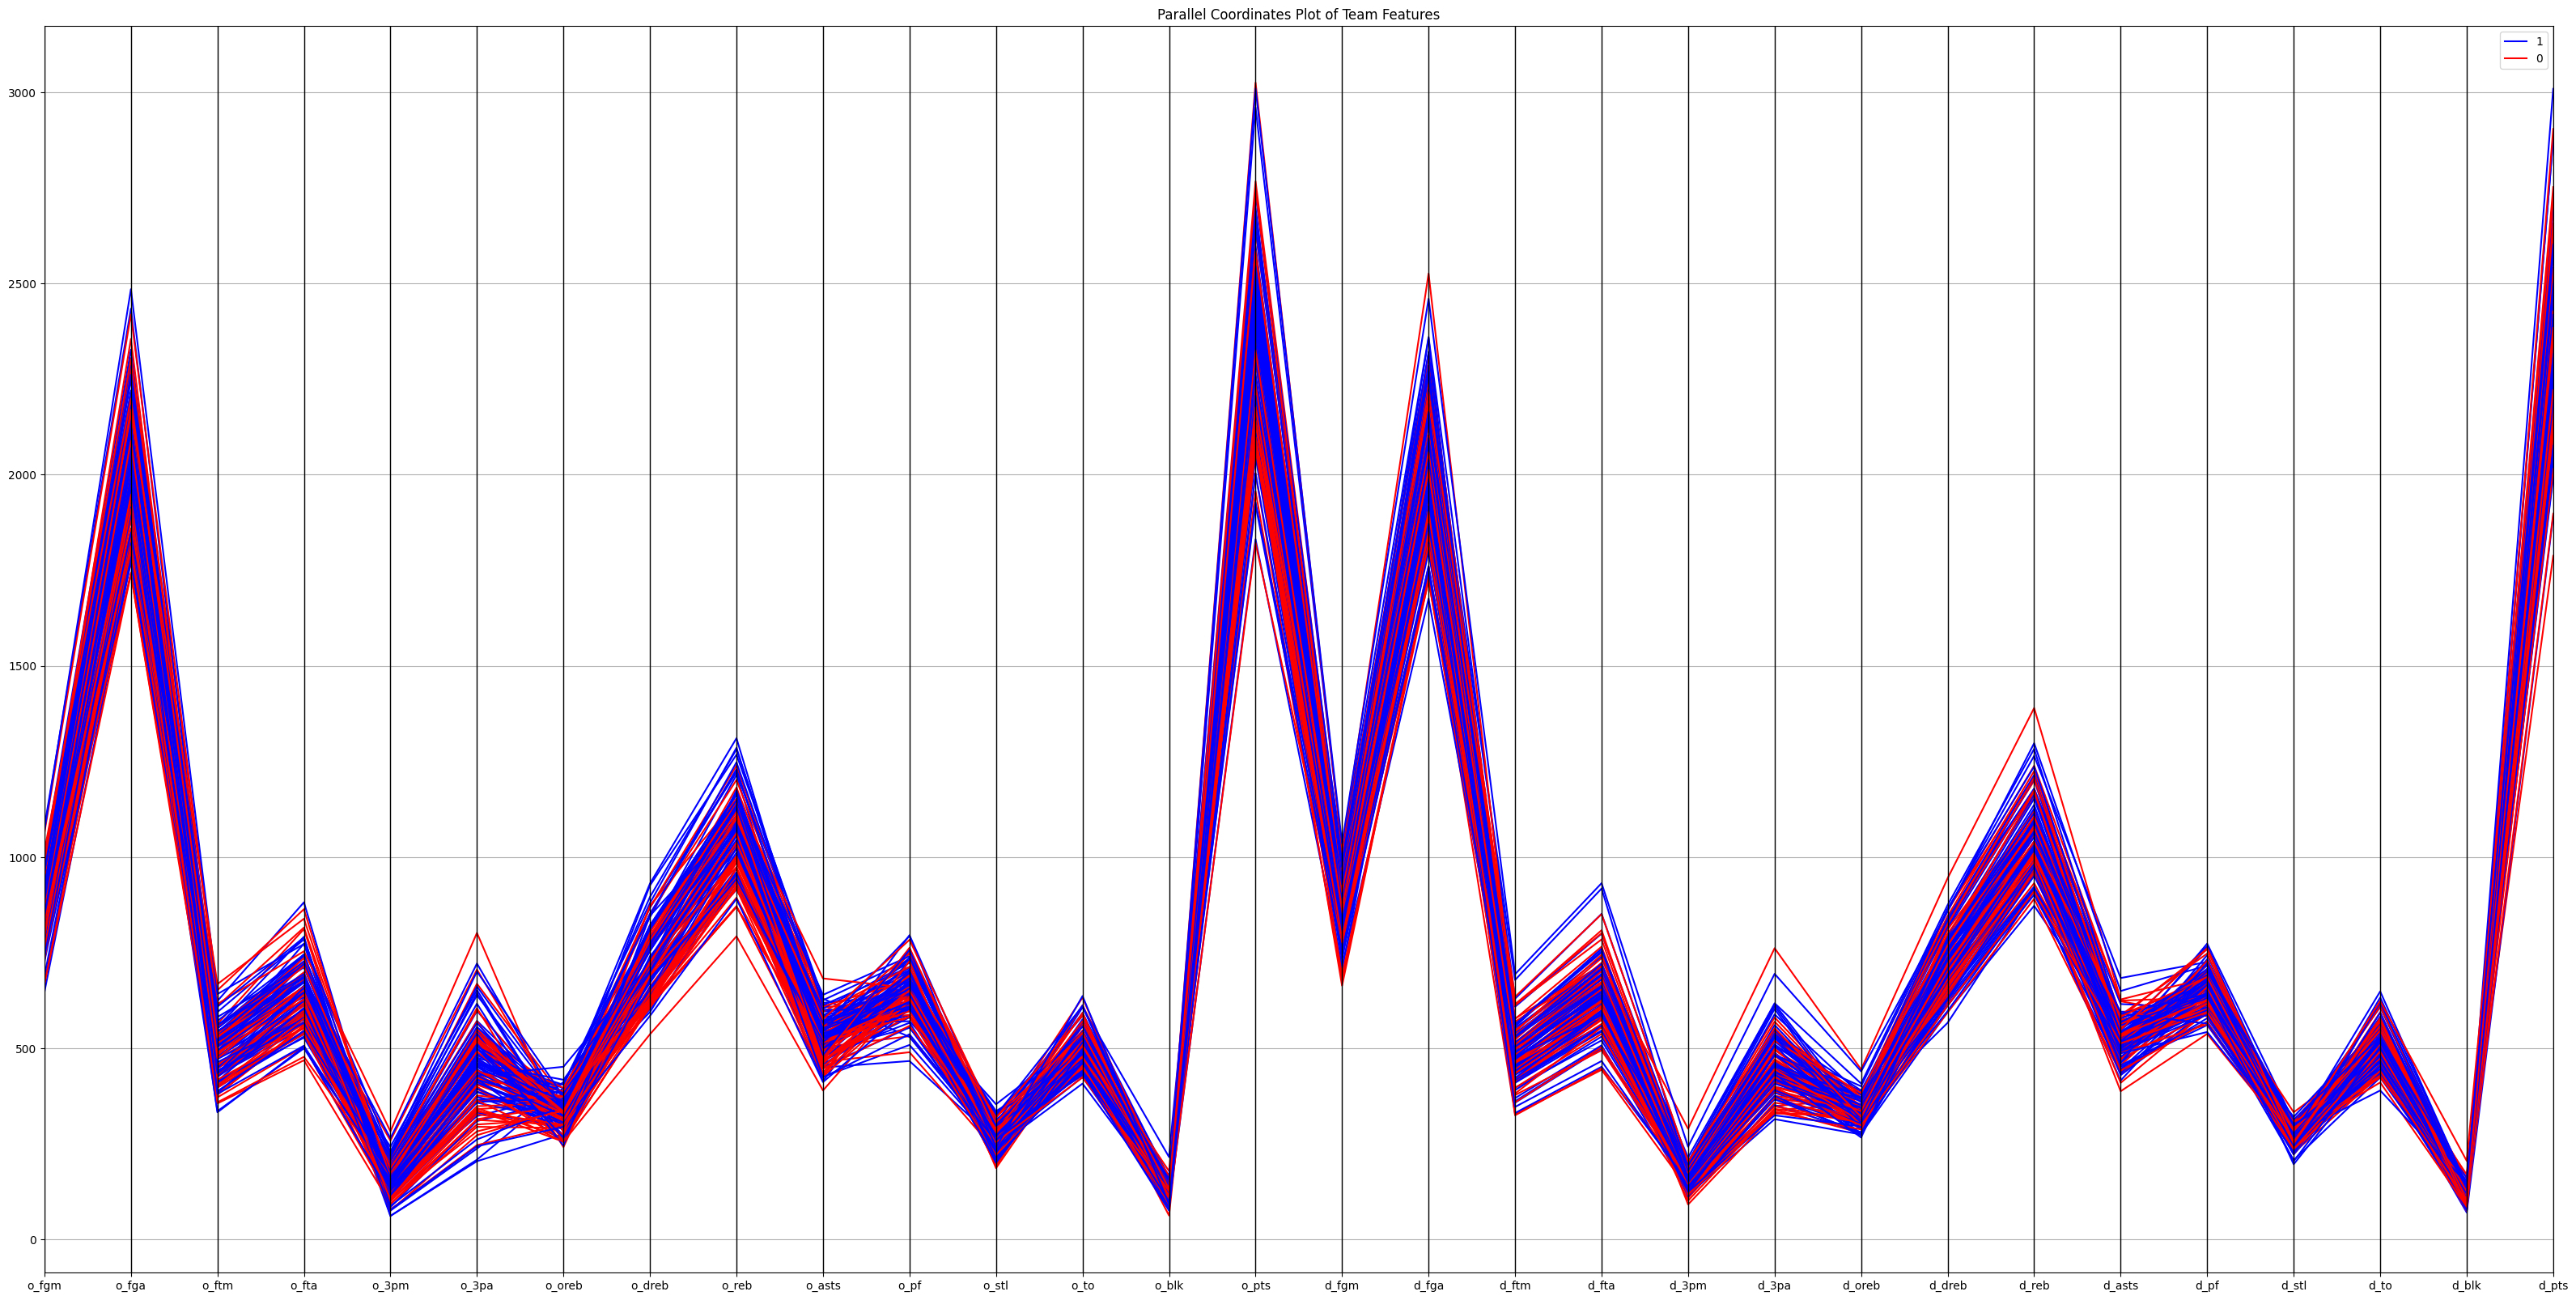

In [285]:
teams_copy = teams.copy()

team_features = ['o_fgm','o_fga','o_ftm','o_fta','o_3pm','o_3pa','o_oreb','o_dreb','o_reb','o_asts','o_pf','o_stl','o_to','o_blk','o_pts','d_fgm','d_fga','d_ftm','d_fta','d_3pm','d_3pa','d_oreb','d_dreb','d_reb','d_asts','d_pf','d_stl','d_to','d_blk','d_pts', 'PlayoffNextSeason']

teams_copy = teams_copy.sort_values(by=['tmID', 'year']).reset_index(drop=True)
teams_copy['PlayoffNextSeason'] = teams.groupby('tmID')['playoff'].shift(-1)
teams_copy = teams_copy.dropna(subset=['PlayoffNextSeason'])
teams_copy['PlayoffNextSeason'] = teams_copy['PlayoffNextSeason'].astype(int)

# Map colors to the target classes
custom_colors = ['blue', 'red']  # Blue for 1, Red for 0

plt.figure(figsize=(40, 20))
pd.plotting.parallel_coordinates(teams_copy[team_features], 'PlayoffNextSeason', color=custom_colors)
plt.title('Parallel Coordinates Plot of Team Features')
plt.grid(True)
plt.show()

As seen in this `Parallel Coordinates Plot` of some of Team Features, many features are not really influential in determining if a team will go to playoffs the following season, due to the huge grouping of red (representing 0 in `PlayoffNexySeason`, meaning that team will not go) and blue (representing 1). There are obviously a few exceptions, like `o_reb`, where the blue lines are prevalent at the top, meaning that teams with higher offensive rebounds achieve playoffs the following year. The same can be seen for `o_points`, which makes sense, because it is the objective of the sport. The opposite can also be seen with `d_reb`, with a higher count of red lines at the top, and also `d_points` (both statistics are the exact opposite of the ones seen previously). `o_fta` also has some high count of red lines at the top, with a few blue outliers, meaning these teams have more chances to score points from a free throw, which is a less pressured shot.

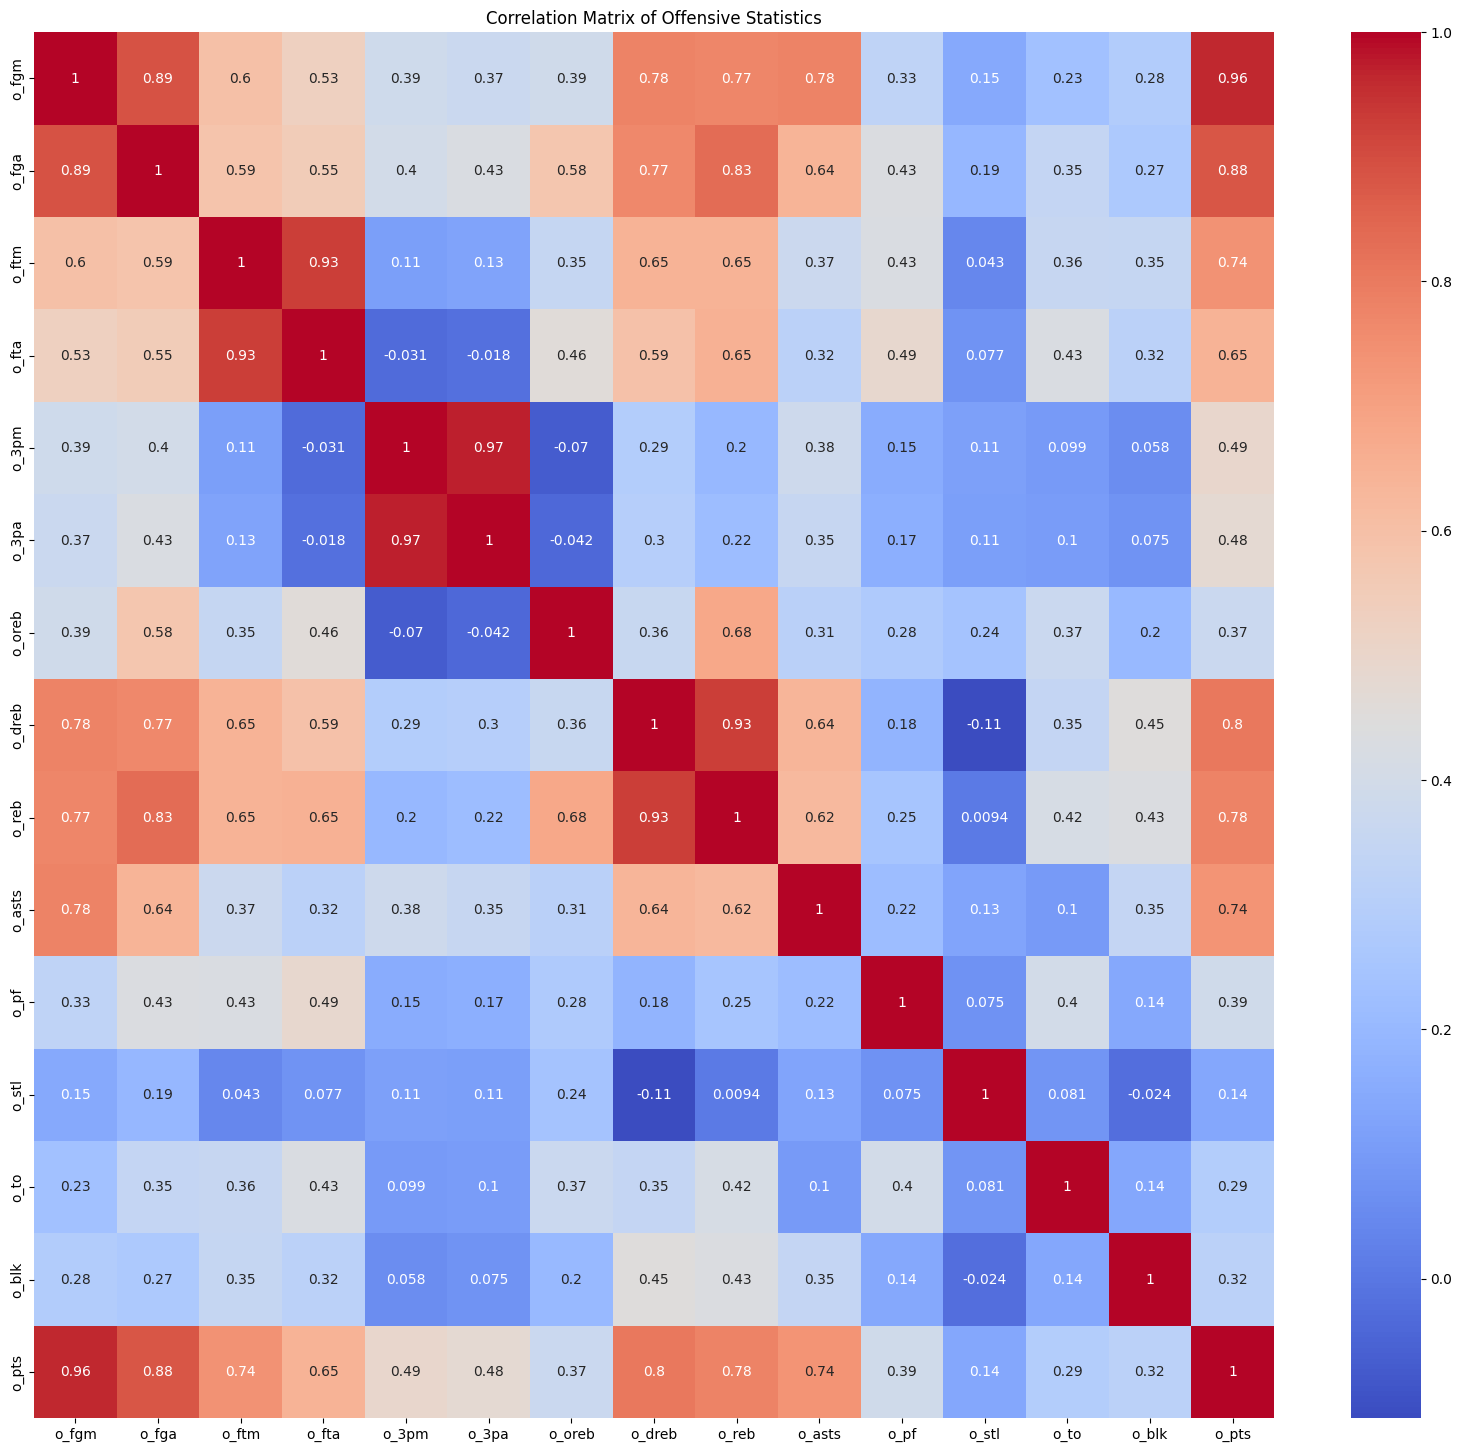

In [286]:
# Offensive statistis heatmap

plt.figure(figsize=(20, 18))
offensive_stats = ['o_fgm','o_fga','o_ftm','o_fta','o_3pm','o_3pa','o_oreb','o_dreb','o_reb','o_asts','o_pf','o_stl','o_to','o_blk','o_pts']
offensive_stats_df = teams_copy[offensive_stats]
offensive_stats_df = offensive_stats_df.corr()
sns.heatmap(offensive_stats_df, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Offensive Statistics')
plt.show()

As seen above, most features do not correlate with each other. `o_pts` has good correlation with multiple scoring metrics, which is expected. Also high correlation between rebound features, because they are very similar or related.

A relatively high correlation between rebound features and `o_fgm` and `o_fga` is also interesting, meaning that winning rebounds could mean more points for a team.

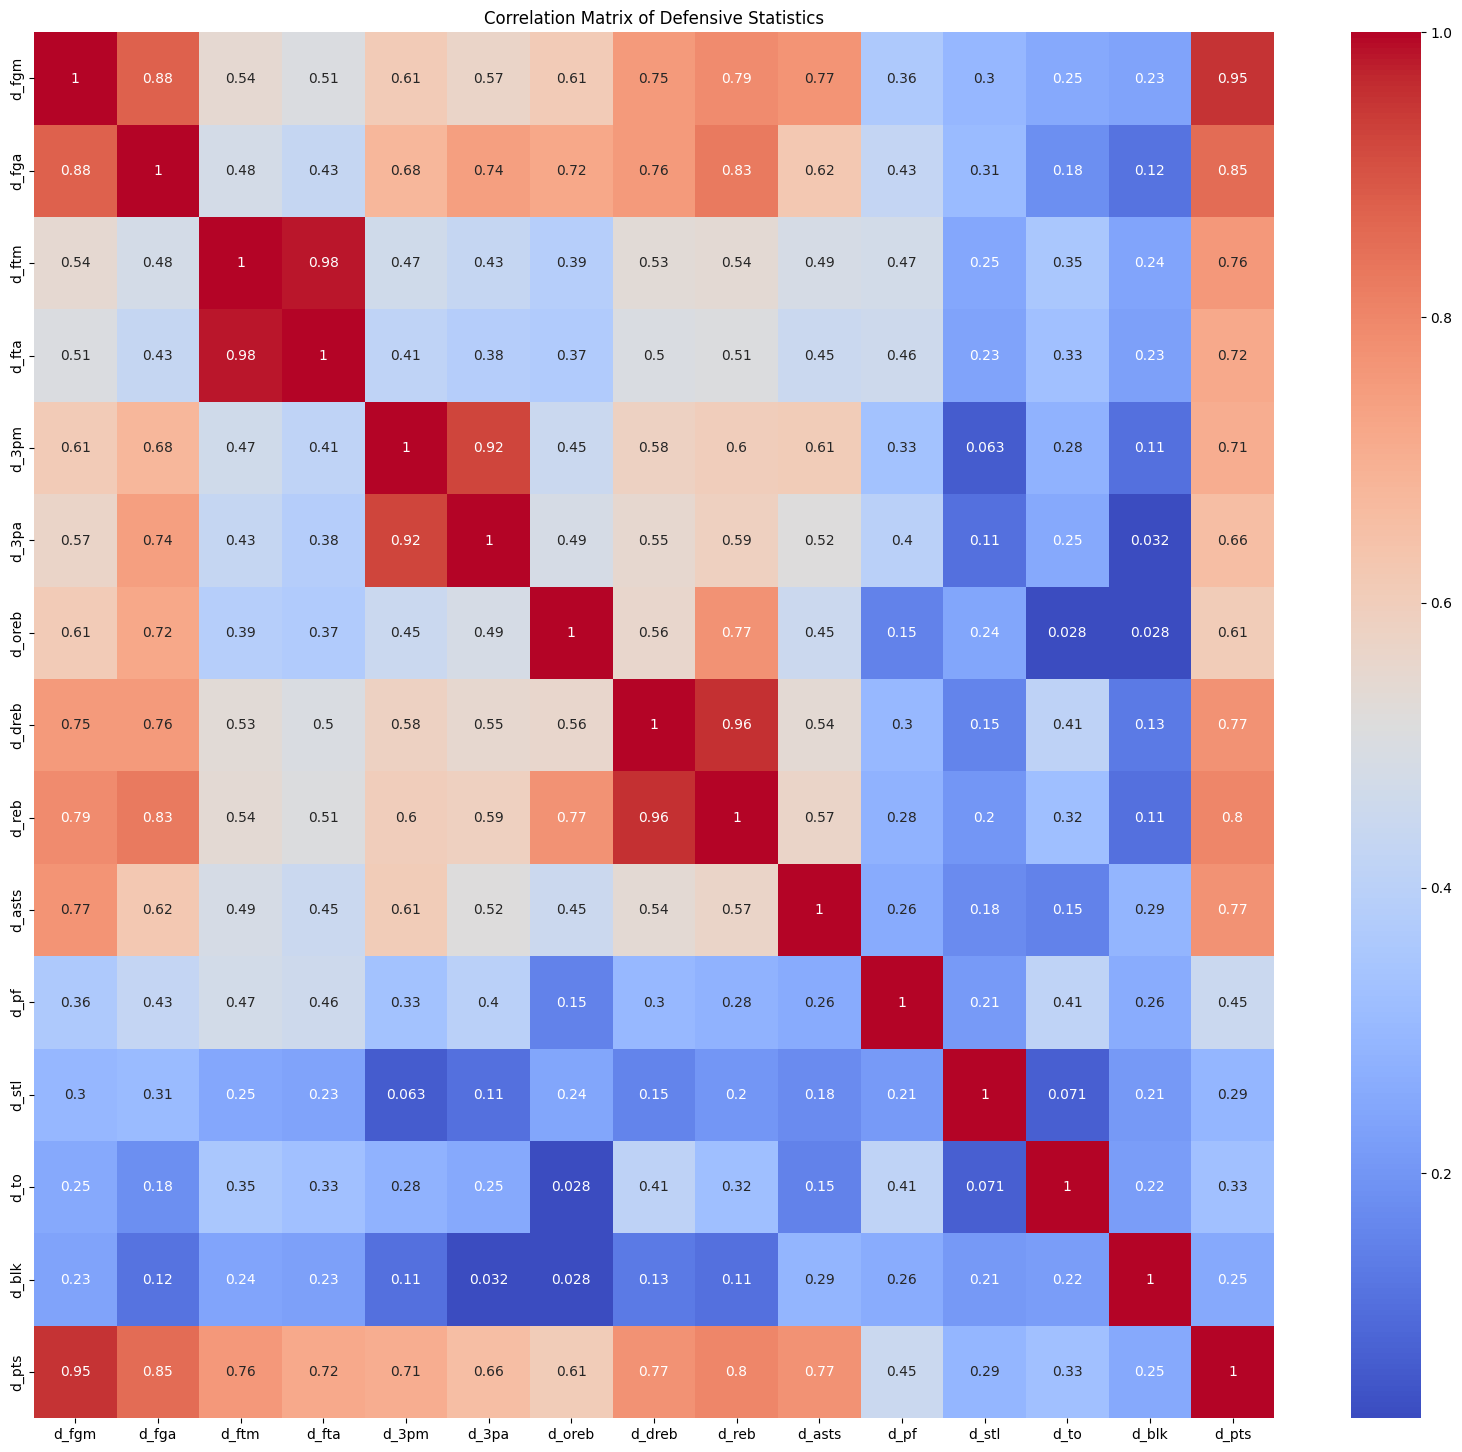

In [287]:
# Defensive statistis heatmap

plt.figure(figsize=(20, 18))
defensive_stats = ['d_fgm','d_fga','d_ftm','d_fta','d_3pm','d_3pa','d_oreb','d_dreb','d_reb','d_asts','d_pf','d_stl','d_to','d_blk','d_pts']
defensive_stats_df = teams_copy[defensive_stats]
defensive_stats_df = defensive_stats_df.corr()
sns.heatmap(defensive_stats_df, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Defensive Statistics')
plt.show()

As expected, the defensive correlation matrix is very similar to the offensive one, with the same features (but from a defensive prespective) correlating with one another. Let's now check the correlation between offensive and defensive features.

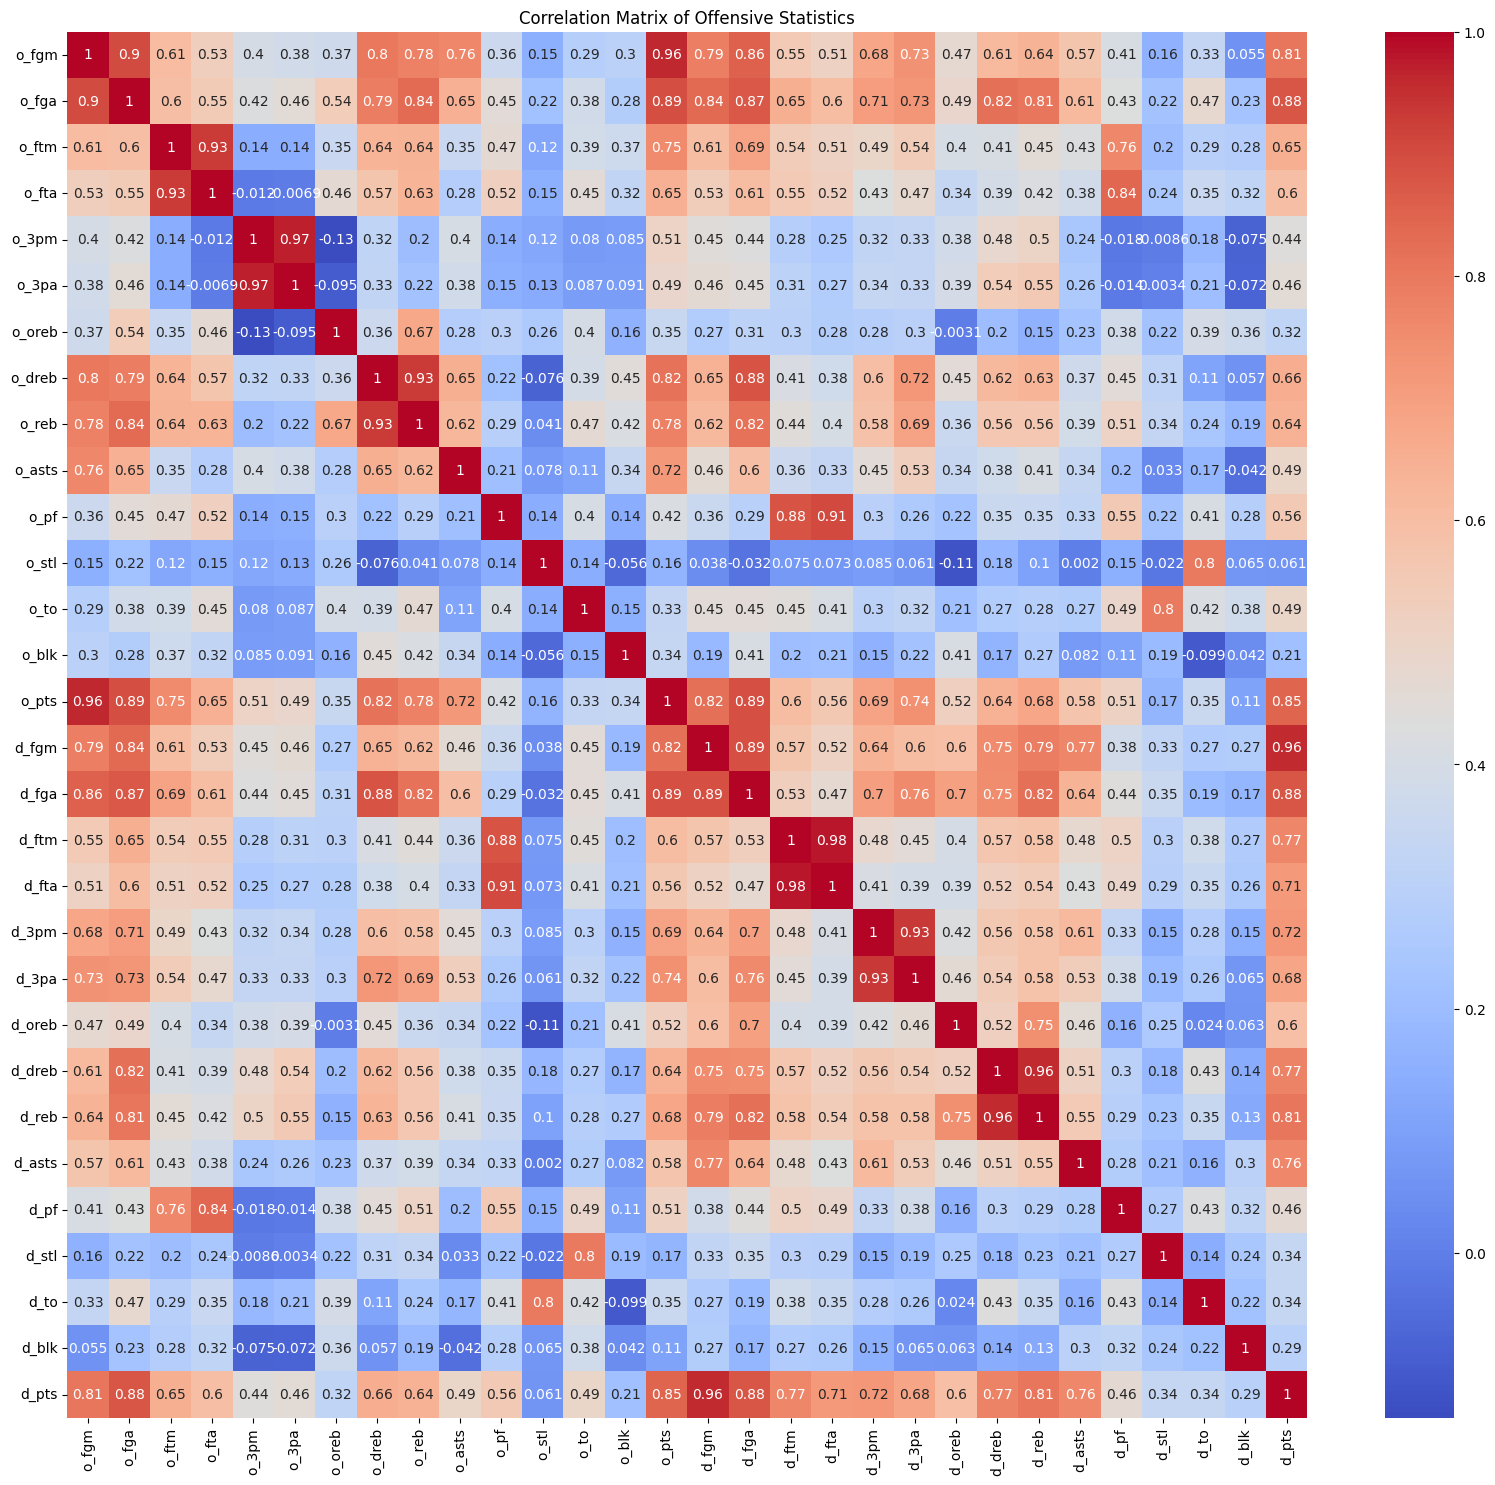

In [288]:
# Offensive and Defensive statistics heatmap

teams_features = ['o_fgm','o_fga','o_ftm','o_fta','o_3pm','o_3pa','o_oreb','o_dreb','o_reb','o_asts','o_pf','o_stl','o_to','o_blk','o_pts','d_fgm','d_fga','d_ftm','d_fta','d_3pm','d_3pa','d_oreb','d_dreb','d_reb','d_asts','d_pf','d_stl','d_to','d_blk','d_pts']

plt.figure(figsize=(20, 18))
sns.heatmap(teams[teams_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Offensive Statistics')
plt.show()

#### Feature Engineering

For feature engineering, we searched the official NBA and WNBA websites for more advanced features we could build from the existing dataset.

Another important point was going to be how to add players and coaches to the final dataset, so we opted to create a feature that attributes a score for every player and coach, and in the case of the players, every team will have an average of their players' rating.

In [289]:
# Create a dataset with all the engineered features
dataset = pd.DataFrame()

# Team Statistics
dataset['Team'] = teams['tmID']
dataset['Year'] = teams['year']
dataset['Rank'] = teams['rank']
dataset['PlayoffProgScore'] = teams['playoff_progression_score']
dataset['GP'] = teams['GP']
dataset['W'] = teams['won']
dataset['L'] = teams['lost']
dataset['WIN%'] = 100 * (teams['won'] / teams['GP'])
dataset['MIN'] = teams['min']
dataset['PTS'] = teams['o_pts']
dataset['FGM'] = teams['o_fgm']
dataset['FGA'] = teams['o_fga']
dataset['FG%'] = 100 * (teams['o_fgm'] / teams['o_fga'])
dataset['3PM'] = teams['o_3pm']
dataset['3PA'] = teams['o_3pa']
dataset['3P%'] = 100 * (teams['o_3pm'] / teams['o_3pa'])
dataset['FTM'] = teams['o_ftm']
dataset['FTA'] = teams['o_fta']
dataset['FT%'] = 100 * (teams['o_ftm'] / teams['o_fta'])
dataset['OREB'] = teams['o_oreb']
dataset['DREB'] = teams['o_dreb']
dataset['REB'] = teams['o_reb']
dataset['AST'] = teams['o_asts']
dataset['TOV'] = teams['o_to']
dataset['STL'] = teams['o_stl']
dataset['BLK'] = teams['o_blk']
dataset['BLKA'] = teams['d_blk']
dataset['PF'] = teams['o_pf']
dataset['PFD'] = teams['d_pf']

# Advanced
dataset['POSS'] = 0.5 * (
    (teams['o_fga'] + 0.4 * teams['o_fta'] -
     1.07 * (teams['o_oreb'] / (teams['o_oreb'] + teams['d_dreb'])) *
     (teams['o_fga'] - teams['o_fgm']) + teams['o_to']) +
    (teams['d_fga'] + 0.4 * teams['d_fta'] -
     1.07 * (teams['d_oreb'] / (teams['d_oreb'] + teams['o_dreb'])) *
     (teams['d_fga'] - teams['d_fgm']) + teams['d_to'])
)
dataset['OFFRTG'] = 100 * (teams['o_pts'] / dataset['POSS'])
dataset['DEFRTG'] = 100 * (teams['d_pts'] / dataset['POSS'])
dataset['NETRTG'] = dataset['OFFRTG'] - dataset['DEFRTG']
dataset['AST/TO'] = teams['o_asts'] / teams['o_to']
dataset['AST RATIO'] = (teams['o_asts'] * 100) / dataset['POSS']
dataset['OREB%'] = (
    100 * (teams['o_oreb'] * (dataset['MIN'] / 5)) / 
    (dataset['MIN'] * (teams['o_oreb'] + teams['d_dreb']))
)
dataset['DREB%'] = (
    100 * (teams['o_dreb'] * (dataset['MIN'] / 5)) / 
    (dataset['MIN'] * (teams['o_dreb'] + teams['d_oreb']))
)
dataset['REB%'] = (
    100 * (teams['o_reb'] * (dataset['MIN'] / 5)) / 
    (dataset['MIN'] * (teams['o_reb'] + teams['d_reb']))
)
dataset['TOV%'] = 100 * teams['o_to'] / (
    teams['o_fga'] + 0.44 * teams['o_fta'] + teams['o_to']
)
dataset['EFG%'] = 100 * ((teams['o_fgm'] + (0.5 * teams['o_3pm'])) / teams['o_fga'])
dataset['TS%'] = 100 * (teams['o_pts'] / (2 * (teams['o_fga'] + 0.44 * teams['o_fta'])))

OPPPOSS = 0.5 * (
    (teams['d_fga'] + 0.4 * teams['d_fta'] -
     1.07 * (teams['d_oreb'] / (teams['d_oreb'] + teams['o_dreb'])) *
     (teams['d_fga'] - teams['d_fgm']) + teams['d_to']) +
    (teams['o_fga'] + 0.4 * teams['o_fta'] -
     1.07 * (teams['o_oreb'] / (teams['o_oreb'] + teams['d_dreb'])) *
     (teams['o_fga'] - teams['o_fgm']) + teams['o_to'])
)
dataset['PACE'] = 40 * ((dataset['POSS'] + OPPPOSS) / (2 * (dataset['MIN'] / 5)))

# Add Cumulative Playoff Progression Score
# Sort the dataset by Team and Year to ensure the cumulative sum is calculated correctly
dataset = dataset.sort_values(['Team', 'Year'])

# Add a new column for the cumulative playoff progression score up to the current year for each team
dataset['CumulativePlayoffProgScore'] = dataset.groupby('Team')['PlayoffProgScore'].cumsum()

# Rename player stats columns to match team stats naming convention
players_teams = players_teams.rename(columns={
    'points': 'PTS',
    'fgMade': 'FGM',
    'ftMade': 'FTM',
    'fgAttempted': 'FGA',
    'ftAttempted': 'FTA',
    'dRebounds': 'DREB',
    'oRebounds': 'OREB',
    'assists': 'AST',
    'steals': 'STL',
    'blocks': 'BLK',
    'PF': 'PF',
    'turnovers': 'TOV'
})

# Merge player and team datasets on team ID and year
merged_data = players_teams.merge(
    dataset,
    left_on=['tmID', 'year'],
    right_on=['Team', 'Year'],
    suffixes=('', '_team')
)

# Calculate GmStats as a proportion of team stats
merged_data['games_ratio'] = merged_data['GP'] / merged_data['GP_team']

# Define game-level stats for players
team_stat_columns = [
    'PTS', 'FGM', 'FTM', 'FGA', 'FTA', 'DREB', 'OREB', 'AST', 'STL', 'BLK', 'PF', 'TOV'
]

for stat in team_stat_columns:
    merged_data[f'Gm{stat}'] = merged_data['games_ratio'] * merged_data[f'{stat}_team']

# Calculate PIE for each player
merged_data['PIE'] = (
    merged_data['PTS'] + 
    merged_data['FGM'] + 
    merged_data['FTM'] - 
    merged_data['FGA'] - 
    merged_data['FTA'] + 
    merged_data['DREB'] + 
    (0.5 * merged_data['OREB']) + 
    merged_data['AST'] + 
    merged_data['STL'] + 
    (0.5 * merged_data['BLK']) - 
    merged_data['PF'] - 
    merged_data['TOV']
) / (
    merged_data['GmPTS'] + 
    merged_data['GmFGM'] + 
    merged_data['GmFTM'] - 
    merged_data['GmFGA'] - 
    merged_data['GmFTA'] + 
    merged_data['GmDREB'] + 
    (0.5 * merged_data['GmOREB']) + 
    merged_data['GmAST'] + 
    merged_data['GmSTL'] + 
    (0.5 * merged_data['GmBLK']) - 
    merged_data['GmPF'] - 
    merged_data['GmTOV']
)

# Average PIE for players with multiple stints in the same year
merged_data = merged_data.groupby(['playerID', 'year'], as_index=False).agg({
    'PIE': 'mean',
    'tmID': 'first',  # Retain the first team ID for simplicity
    'games_ratio': 'sum'  # Sum games ratio to ensure accurate contribution
})

# Calculate Win Percentage for coaches
def calculate_win_percentage(df):
    # Total Wins = Regular Season Wins + Post-Season Wins
    df['total_wins'] = df['won'] + df['post_wins']
    
    # Total Games = Regular Season Wins + Regular Season Losses + Post-Season Wins + Post-Season Losses
    df['total_games'] = df['won'] + df['lost'] + df['post_wins'] + df['post_losses']
    
    # Win Percentage
    df['win_percentage'] = df['total_wins'] / df['total_games']
    
    # Handle division by zero if any
    df['win_percentage'] = df['win_percentage'].fillna(0)
    
    return df

coaches = calculate_win_percentage(coaches)

# Merge coach awards
coaches = coaches.merge(
    coach_awards[['coachID', 'year', 'award']],
    on=['coachID', 'year'],
    how='left'
)

# Create a final performance metric
def final_performance_metric(df):
    # Initialize performance with win_percentage
    df['performance'] = df['win_percentage']
    
    # Add bonus if Coach of the Year
    df.loc[df['award'] == 'Coach of the Year', 'performance'] += 0.05
    
    # Ensure performance does not exceed 1
    df['performance'] = df['performance'].clip(upper=1.0)
    
    return df

coaches = final_performance_metric(coaches)

# Aggregate yearly coach performance accounting for multiple stints
def aggregate_yearly_coach_performance(coaches_df):
    """
    Aggregate coach performance across multiple teams in the same year,
    weighted by the number of total games in each stint
    """
    # Calculate total games for each stint
    coaches_df['total_stint_games'] = coaches_df['won'] + coaches_df['lost'] + coaches_df['post_wins'] + coaches_df['post_losses']
    
    # Group by coach and year to get total games
    yearly_games = coaches_df.groupby(['coachID', 'year'])['total_stint_games'].sum().reset_index()
    yearly_games = yearly_games.rename(columns={'total_stint_games': 'total_year_games'})
    
    # Merge back to get the proportion of games for each stint
    coaches_df = coaches_df.merge(yearly_games, on=['coachID', 'year'])
    coaches_df['stint_weight'] = coaches_df['total_stint_games'] / coaches_df['total_year_games']
    
    # Calculate weighted performance for each stint
    coaches_df['weighted_performance'] = coaches_df['performance'] * coaches_df['stint_weight']
    
    # Aggregate to get yearly performance
    yearly_performance = coaches_df.groupby(['coachID', 'year'], as_index=False).agg({
        'weighted_performance': 'sum'  # Sum of weighted performances gives us the yearly performance
    }).rename(columns={'weighted_performance': 'yearly_performance'})
    
    return yearly_performance

# Create yearly performance DataFrame
yearly_coach_performance = aggregate_yearly_coach_performance(coaches)

# Create dictionaries for quick access
pie_dict = merged_data.set_index(['playerID', 'year'])['PIE'].to_dict()
coach_performance_dict = yearly_coach_performance.set_index(['coachID', 'year'])['yearly_performance'].to_dict()
coach_dict = coaches.set_index(['tmID', 'year'])['coachID'].to_dict()

# Create dictionaries of all years available for coaches and players
coach_years = {}
for coach_id, year in coach_performance_dict.keys():
    if coach_id not in coach_years:
        coach_years[coach_id] = []
    coach_years[coach_id].append(year)

player_years = {}
for pid, year in pie_dict.keys():
    if pid not in player_years:
        player_years[pid] = []
    player_years[pid].append(year)

# Calculate yearly averages
yearly_avg_performance = yearly_coach_performance.groupby('year')['yearly_performance'].mean().to_dict()
yearly_avg_pie = merged_data.groupby('year')['PIE'].mean().to_dict()

# Initialize new columns with None
dataset['AvgPIE_NextYearPlayers'] = None
dataset['Performance_NextYearCoach'] = None

# Process each team-year combination
for index, row in dataset.iterrows():
    team = row['Team']
    year = row['Year']
    next_year = year + 1
    
    # Get next year's coach and their performance
    next_year_coach = coach_dict.get((team, next_year))
    current_year_performance = None
    
    if next_year_coach:
        # Try to get current year performance
        current_year_performance = coach_performance_dict.get((next_year_coach, year))
        
        if current_year_performance is None and next_year_coach in coach_years:
            # If no current year performance, find the most recent previous performance
            previous_years = [y for y in coach_years[next_year_coach] if y < year]
            if previous_years:
                most_recent_year = max(previous_years)
                current_year_performance = coach_performance_dict.get((next_year_coach, most_recent_year))
        
        if current_year_performance is None:
            # If still no performance (rookie coach), use year average
            current_year_performance = yearly_avg_performance.get(year)
    
    # Get next year's players and their PIE values
    players_next_year = players_teams[
        (players_teams['tmID'] == team) & (players_teams['year'] == next_year)
    ]
    
    avg_pie = None
    if not players_next_year.empty:
        player_ids = players_next_year['playerID'].unique()
        team_pies = []
        
        for pid in player_ids:
            pie = None
            pie_key = (pid, year)
            pie = pie_dict.get(pie_key)
            
            if pie is None and pid in player_years:
                previous_years = [y for y in player_years[pid] if y < year]
                if previous_years:
                    most_recent_year = max(previous_years)
                    pie = pie_dict.get((pid, most_recent_year))
            
            if pie is None:
                pie = yearly_avg_pie.get(year)
            
            if pie is not None:
                team_pies.append(pie)
        
        if team_pies:
            avg_pie = sum(team_pies) / len(team_pies)
    
    # Update the dataset
    dataset.loc[index, 'AvgPIE_NextYearPlayers'] = avg_pie
    dataset.loc[index, 'Performance_NextYearCoach'] = current_year_performance

# Convert columns to float type for consistency
dataset['AvgPIE_NextYearPlayers'] = dataset['AvgPIE_NextYearPlayers'].astype(float)
dataset['Performance_NextYearCoach'] = dataset['Performance_NextYearCoach'].astype(float)

# First get the earliest year for each team to identify rookie seasons
team_first_years = dataset.groupby('Team')['Year'].min()
rookie_teams_data = dataset[dataset.apply(lambda x: x['Year'] == team_first_years[x['Team']], axis=1)]

# Identify integer columns
int_columns = dataset.select_dtypes(include=['int64']).columns

# Calculate averages for numeric columns except PIE and Performance
columns_to_average = dataset.select_dtypes(include=['int64', 'float64']).columns
columns_to_average = columns_to_average.drop(['AvgPIE_NextYearPlayers', 'Performance_NextYearCoach'])

# Calculate averages for rookie teams
rookie_averages = rookie_teams_data[columns_to_average].mean()

# Create new row for TUL
new_team_row = pd.Series(rookie_averages)
new_team_row['Team'] = 'TUL'
new_team_row['Year'] = 10

# Round integer columns to nearest integer
for col in int_columns:
    if col in new_team_row.index:
        new_team_row[col] = round(new_team_row[col])

# Calculate PIE and Performance for the new team just like other teams
team = 'TUL'
year = 10
next_year = year + 1

# Get next year's coach and their performance
next_year_coach = coach_dict.get((team, next_year))
current_year_performance = None

if next_year_coach:
    # Try to get current year performance
    current_year_performance = coach_performance_dict.get((next_year_coach, year))
    
    if current_year_performance is None and next_year_coach in coach_years:
        # If no current year performance, find the most recent previous performance
        previous_years = [y for y in coach_years[next_year_coach] if y < year]
        if previous_years:
            most_recent_year = max(previous_years)
            current_year_performance = coach_performance_dict.get((next_year_coach, most_recent_year))
    
    if current_year_performance is None:
        # If still no performance (rookie coach), use year average
        current_year_performance = yearly_avg_performance.get(year)

# Get next year's players and their PIE values
players_next_year = players_teams[
    (players_teams['tmID'] == team) & (players_teams['year'] == next_year)
]

avg_pie = None
if not players_next_year.empty:
    player_ids = players_next_year['playerID'].unique()
    team_pies = []
    
    for pid in player_ids:
        pie = None
        pie_key = (pid, year)
        pie = pie_dict.get(pie_key)
        
        if pie is None and pid in player_years:
            previous_years = [y for y in player_years[pid] if y < year]
            if previous_years:
                most_recent_year = max(previous_years)
                pie = pie_dict.get((pid, most_recent_year))
        
        if pie is None:
            pie = yearly_avg_pie.get(year)
        
        if pie is not None:
            team_pies.append(pie)
    
    if team_pies:
        avg_pie = sum(team_pies) / len(team_pies)

# Add calculated values to new row
new_team_row['AvgPIE_NextYearPlayers'] = avg_pie
new_team_row['Performance_NextYearCoach'] = current_year_performance

# Add the new row to the dataset
dataset = pd.concat([dataset, pd.DataFrame([new_team_row])], ignore_index=True)

# Sort dataset by Team and Year for clarity
dataset = dataset.sort_values(['Team', 'Year'])

year_11 = pd.read_csv("../Season_11/teams.csv")

# Get teams that exist in year 11
teams_in_year_11 = year_11[year_11['year'] == 11]['tmID'].unique()

# Filter the dataset for year 10 and only keep teams that exist in year 11
year_10_data = dataset[
    (dataset['Year'] == 10) & 
    (dataset['Team'].isin(teams_in_year_11))
]

# Sort by team alphabetically
year_10_data = year_10_data.sort_values('Team')

# Save the filtered data to a CSV file
output_file_path = '../cleaned_data/year_10_stats.csv'  # Modify the path if needed
year_10_data.to_csv(output_file_path, index=False)

print(f"Year 10 stats saved to {output_file_path}")

Year 10 stats saved to ../cleaned_data/year_10_stats.csv


Shifting the playoff value from the next season by -1 so that we have a label column to train the models.

In [290]:
# Label
teams = teams.sort_values(by=['tmID', 'year']).reset_index(drop=True)
dataset['PlayoffNextSeason'] = teams.groupby('tmID')['playoff'].shift(-1)
dataset = dataset.dropna(subset=['PlayoffNextSeason'])
dataset['PlayoffNextSeason'] = dataset['PlayoffNextSeason'].astype(int)

#### Data Rebalancing

Because 8 teams make the playoffs and 4 do not, there is an obvious data balancing problem in the dataset. Therefore, we applied SMOTE to balance these classes and verified the resampled data to check the rebalancing was correct.

In [291]:
dataset = dataset.drop(columns=['Team', 'Year'])

# Separate features and target variable
X = dataset.drop(columns=['PlayoffNextSeason'])
y = dataset['PlayoffNextSeason']

display(y.value_counts())

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verify the new class distribution after applying SMOTE
display(y_resampled.value_counts())

# Merge resampled data into a new DataFrame
balanced_dataset = pd.DataFrame(X_resampled, columns=X.columns)
balanced_dataset['PlayoffNextSeason'] = y_resampled

dataset = balanced_dataset

PlayoffNextSeason
1    71
0    51
Name: count, dtype: int64

PlayoffNextSeason
1    71
0    71
Name: count, dtype: int64

### Final Features

So after engineering some features, let's check the `Parallel Coordinates Plot` again. The features will be separated between 2 graphs so that features with smaller ranges can be seen properly.

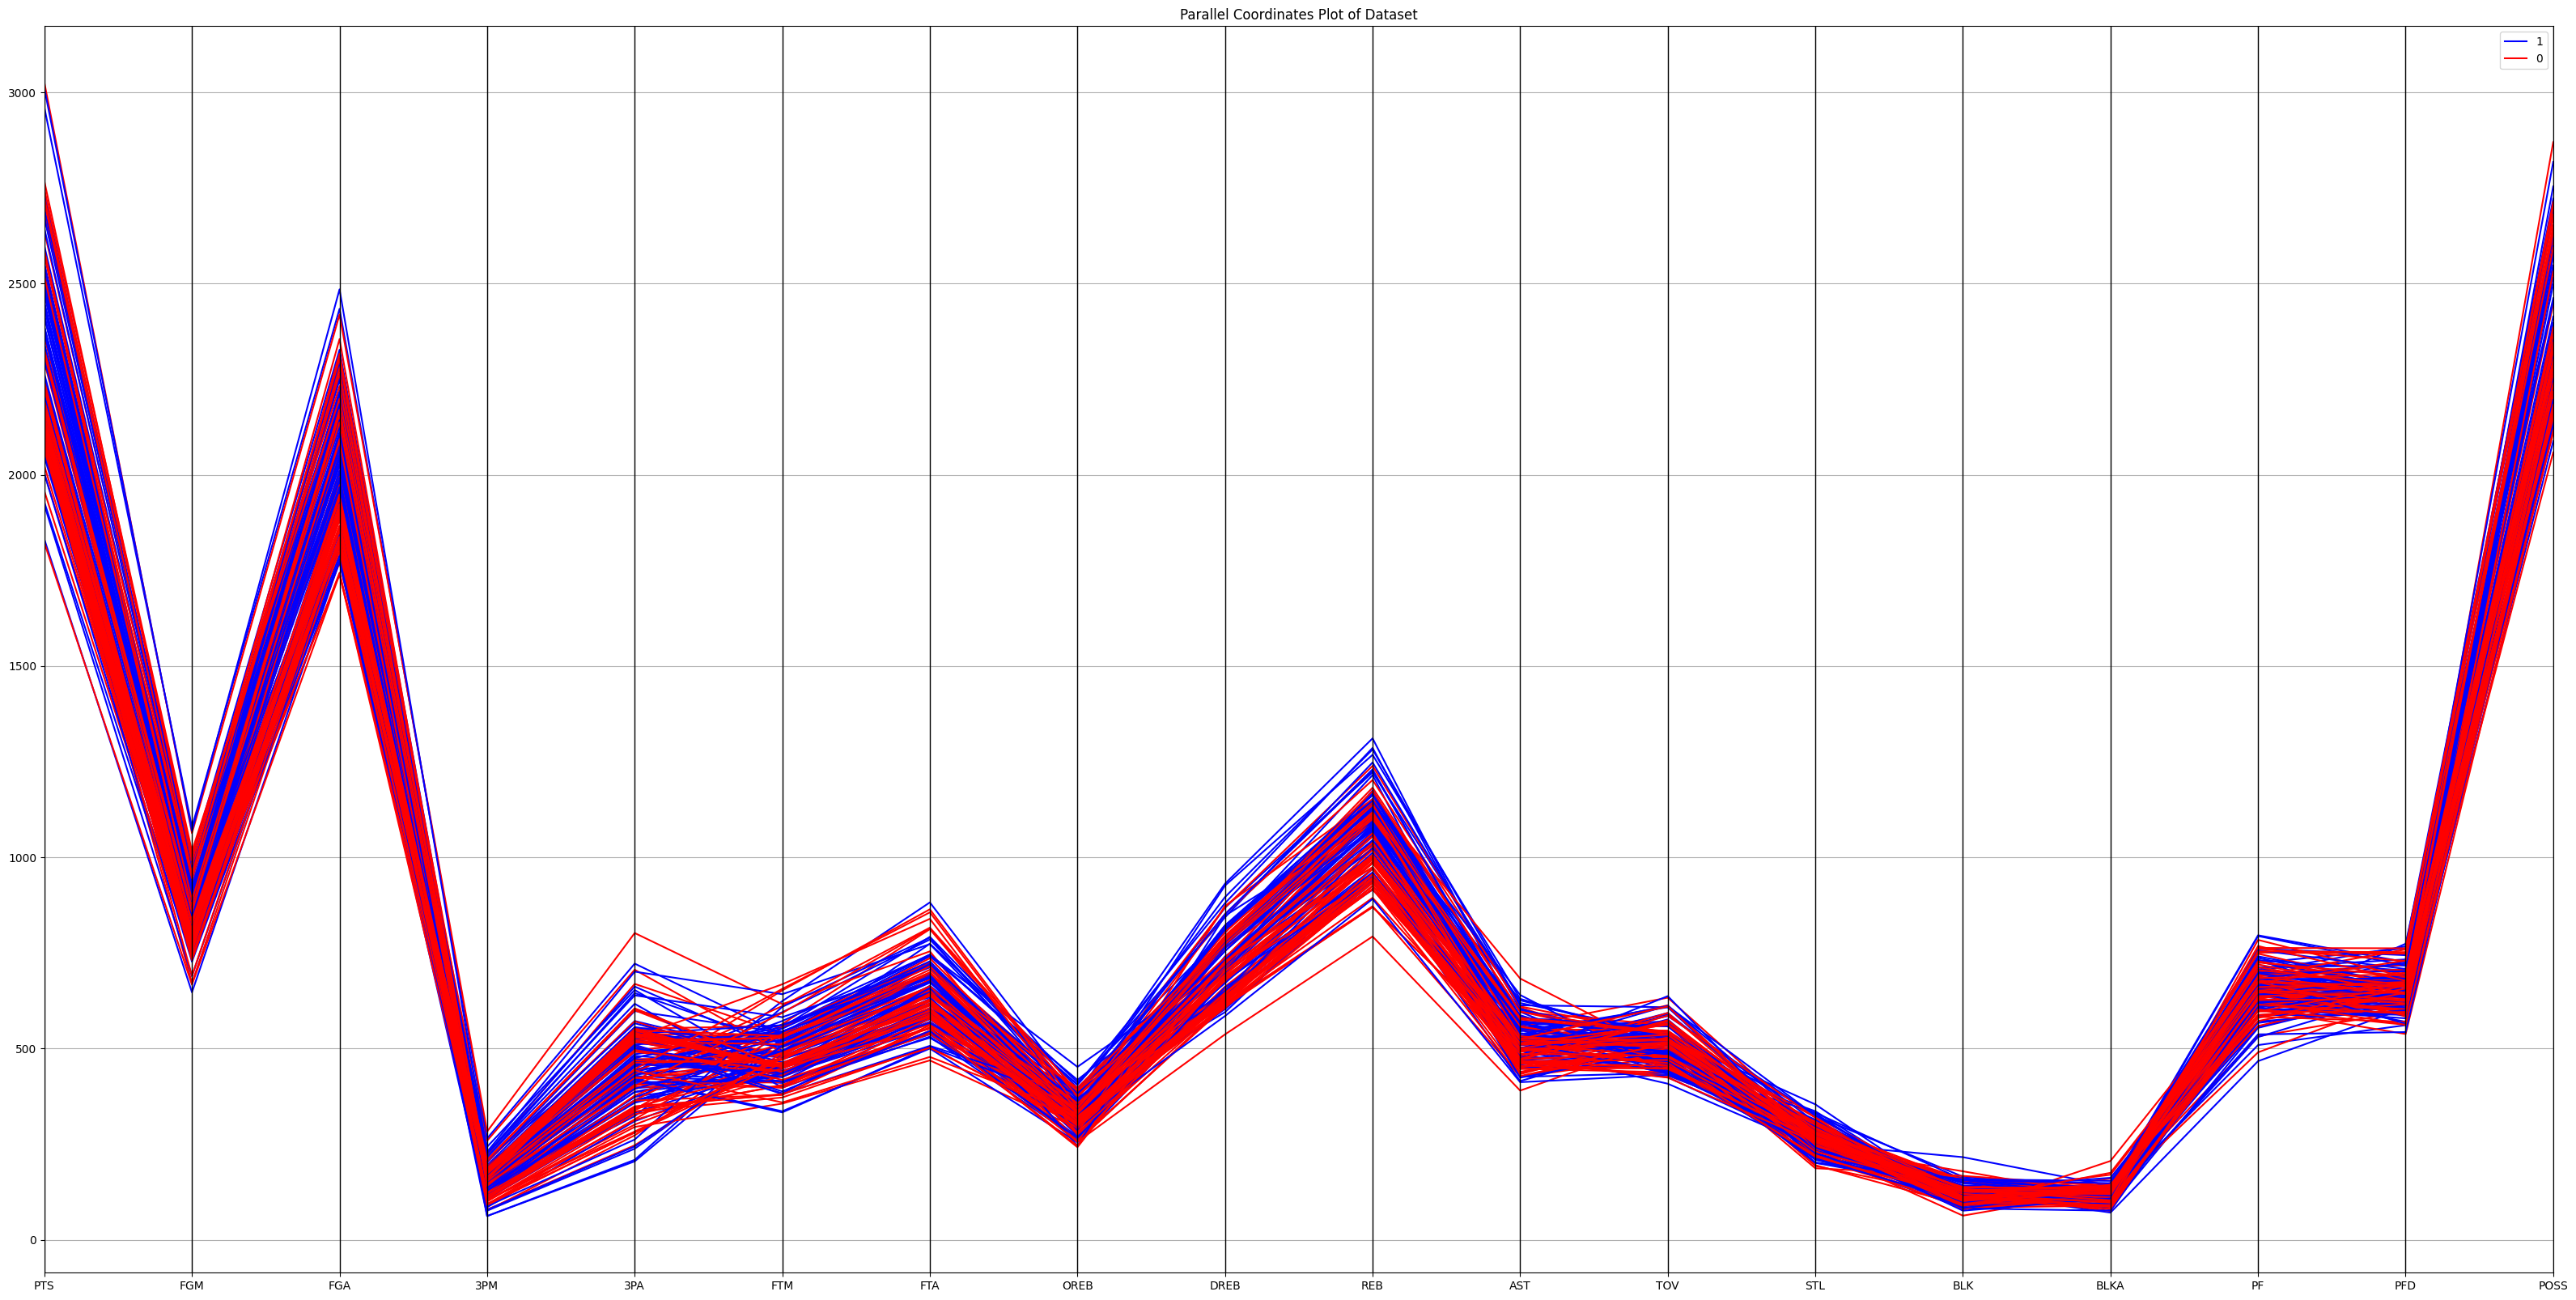

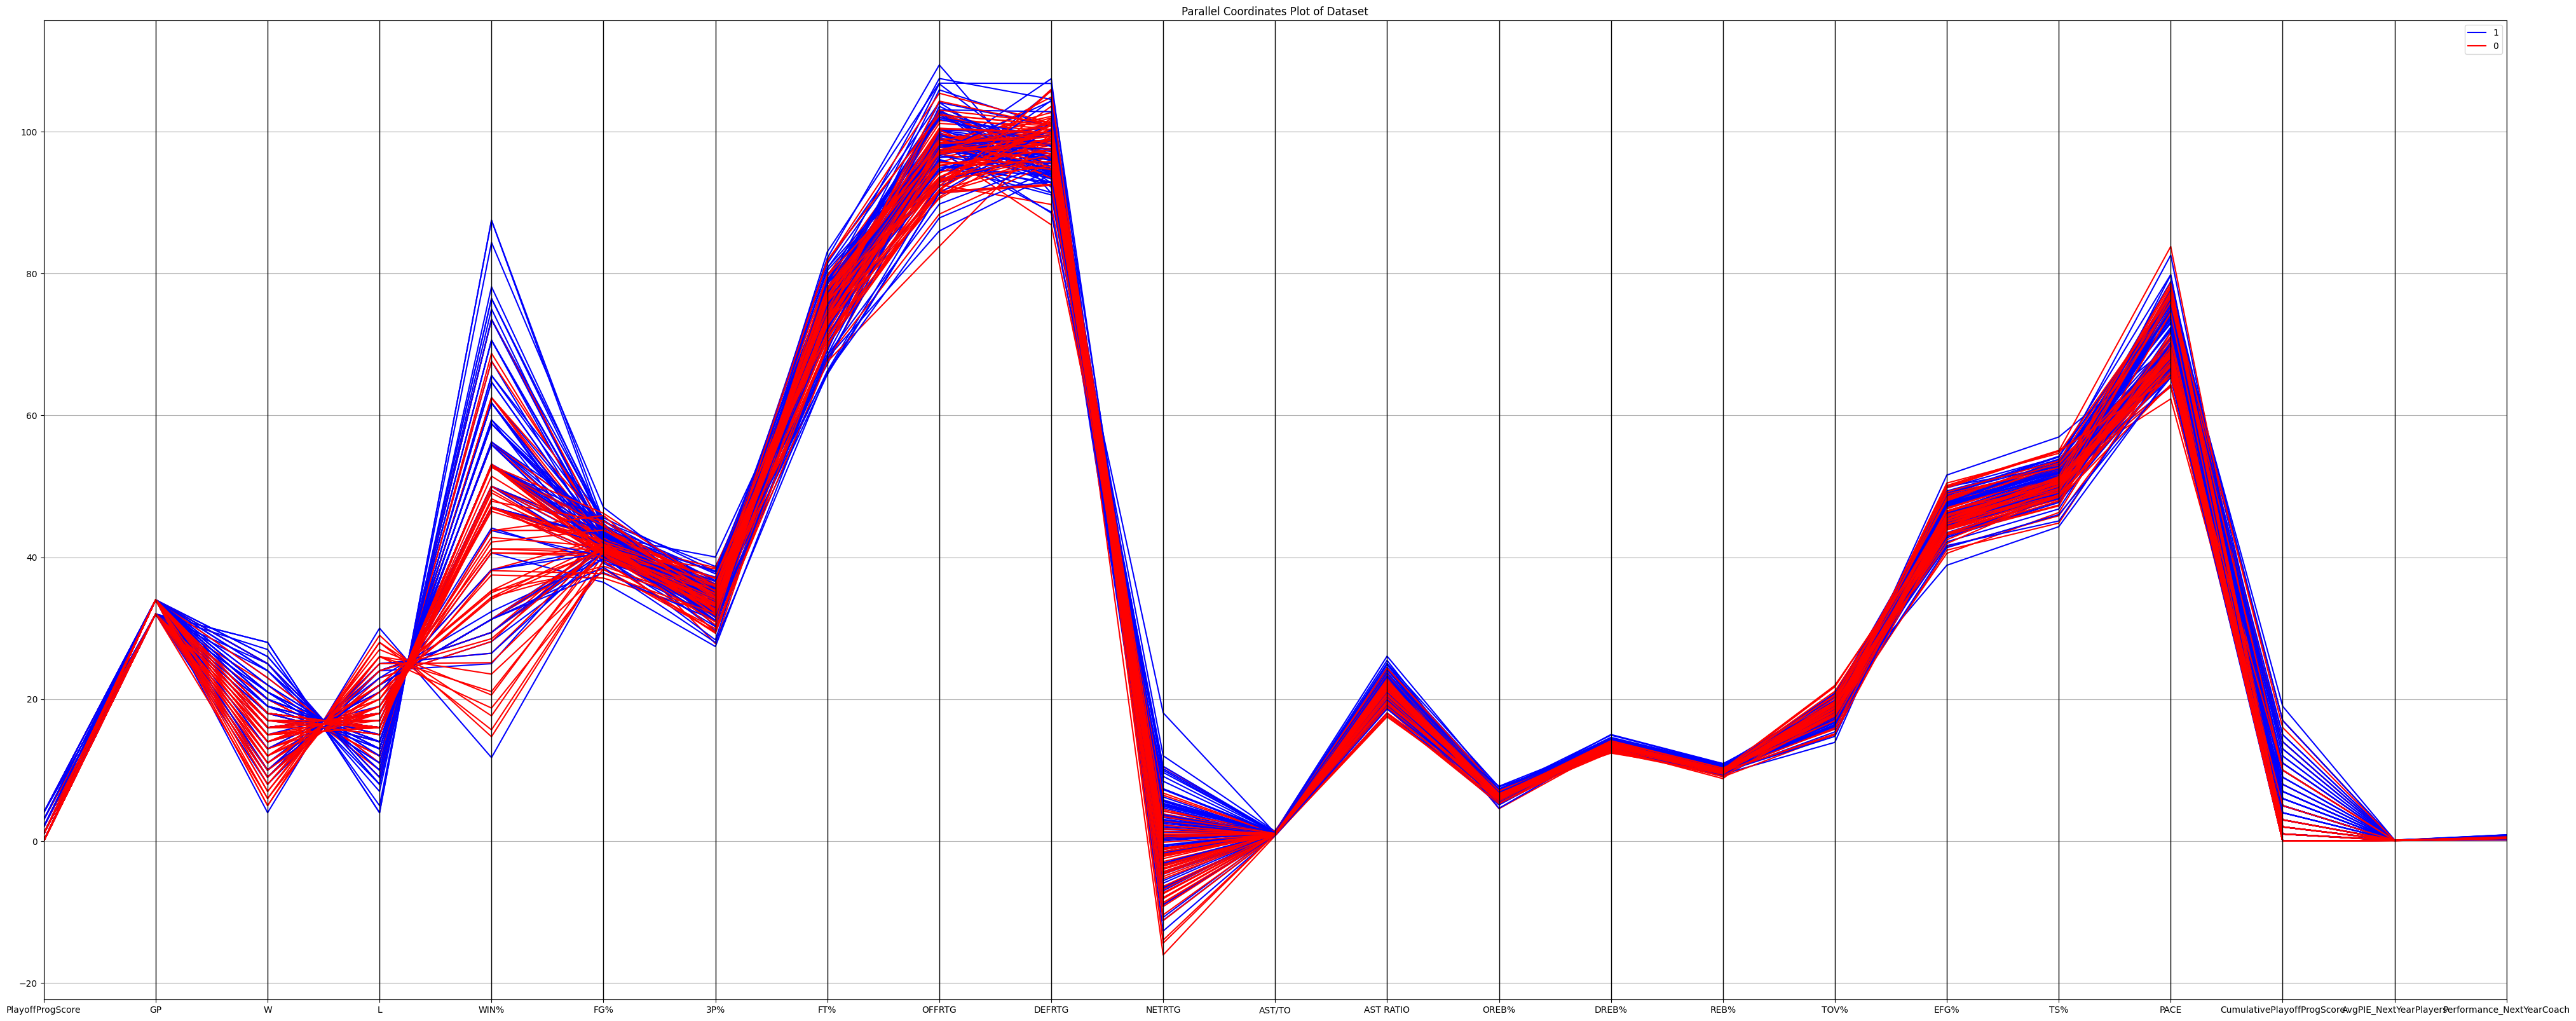

In [292]:
dataset_features = ['PTS','FGM','FGA','3PM','3PA','FTM','FTA','OREB','DREB','REB','AST','TOV','STL','BLK','BLKA','PF','PFD','POSS','PlayoffNextSeason']

smaller_range_features = ['PlayoffProgScore','GP','W','L','WIN%','FG%','3P%','FT%','OFFRTG','DEFRTG','NETRTG','AST/TO','AST RATIO','OREB%','DREB%','REB%', 'TOV%','EFG%','TS%','PACE','CumulativePlayoffProgScore','AvgPIE_NextYearPlayers','Performance_NextYearCoach', 'PlayoffNextSeason']

# Map colors to the target classes
custom_colors = ['blue', 'red']  # Blue for 1, Red for 0

plt.figure(figsize=(40, 20))
pd.plotting.parallel_coordinates(dataset[dataset_features], 'PlayoffNextSeason', color=custom_colors)
plt.title('Parallel Coordinates Plot of Dataset')
plt.grid(True)
plt.show()

plt.figure(figsize=(50, 20))
pd.plotting.parallel_coordinates(dataset[smaller_range_features], 'PlayoffNextSeason', color=custom_colors)
plt.title('Parallel Coordinates Plot of Dataset')
plt.grid(True)
plt.show()

Perfect. After engineering our new features, there is now a clear distinction between the line colors in almost every feature. This clear distinction will likely make it easier for machine learning models to classify teams based on playoff qualification.

Features like `AST`, `3PM`, and `FTM` now show clearer groupings, with blue lines trending higher. These distinctions suggest improved interpretability and predictive strength.

Blue lines dominate higher values for `Points` and `o_reb`, confirming their strong positive correlation with playoff qualification.

Red lines cluster at higher values for `d_reb`, reaffirming your earlier observation that teams with higher defensive rebounds might struggle to qualify.

Features like `Turnovers` and `Personal fouls` show a consistent grouping of red lines at higher values, indicating a negative impact on playoff outcomes.

Blue lines dominate higher values for `Possesions`, which aligns with the idea that more possessions lead to more scoring opportunities and, consequently, better performance.

In [293]:
# Save the new dataset to a CSV file
output_file_path = '../cleaned_data/dataset.csv'
dataset.to_csv(output_file_path, index=False)

print(f"Processed dataset saved to {output_file_path}")

Processed dataset saved to ../cleaned_data/dataset.csv
